1. Problem Statement

Answer:

Cryptocurrency markets are highly volatile. Liquidity—how easily assets can be bought or sold without large price impact—is crucial for market stability. This project requires building a machine learning model to predict cryptocurrency liquidity levels based on market factors (trading volume, transaction patterns, exchange listings, social media activity), aiming to detect liquidity crises early and help traders manage risks effectively.

2. Data Preprocessing

Answer:

Handle missing values by filling with mean/median or removing rows if appropriate.

Clean data to ensure consistency (correct formats and types).

Normalize and scale numerical features using StandardScaler or MinMaxScaler.

Engineer new features, e.g., rolling averages for volume and price, volatility measurements, liquidity ratios.

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('coin_gecko_2022-03-16.csv')
df.ffill(inplace=True)
scaler = MinMaxScaler()
df[['price', '24h_volume']] = scaler.fit_transform(df[['price', '24h_volume']])

3. Exploratory Data Analysis (EDA)

Answer:

Plot distributions of key variables (price, volume).

Analyze time series trends in liquidity.

Check correlation between features and liquidity.

Visualize volatility and identify outliers.

Example:

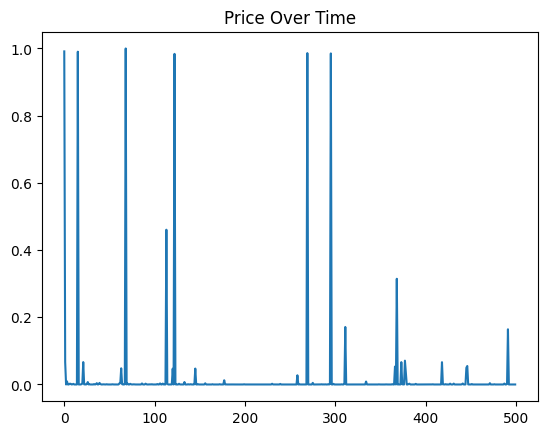

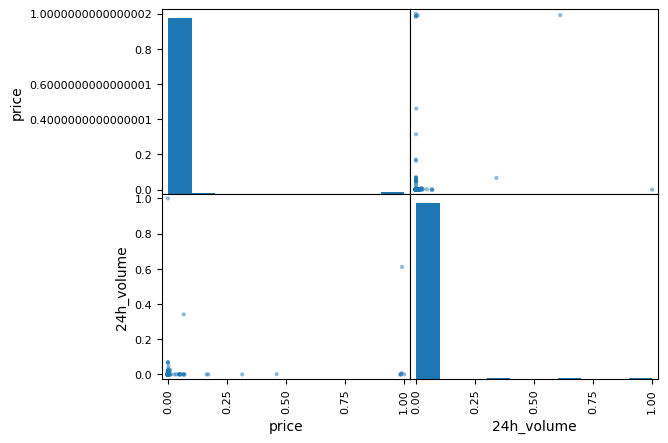

In [4]:
import matplotlib.pyplot as plt
df['price'].plot(title="Price Over Time")
plt.show()
pd.plotting.scatter_matrix(df[['price', '24h_volume']])
plt.show()

4. Feature Engineering
Answer:

Add features like rolling means/standard deviations for price and volume.

Create liquidity ratios (e.g., volume/market cap).

Encode exchanges and other categorical variables using one-hot encoding.

In [6]:
df['volume_rolling'] = df['24h_volume'].rolling(window=7).mean()
df['volatility'] = df['price'].rolling(window=7).std()

5. Model Selection

Answer:

Choose models based on your data:

Time-series models (ARIMA, Prophet) for forecasting.

Regression models (Linear Regression, Random Forest, XGBoost).

Deep learning models (LSTM, GRU) if sequence learning is needed.

6. Model Training

Answer:

Split your dataset into train and test sets.

Fit the chosen model to processed features/target.

Use cross-validation if possible to avoid overfitting.​

Example:

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df[['price', '24h_volume', 'volume_rolling', 'volatility']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
print(df.columns)

Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date', 'volume_rolling', 'volatility'],
      dtype='object')


7. Model Evaluation

Answer:

Evaluate your model using:

RMSE (Root Mean Squared Error)

MAE (Mean Absolute Error)

R
2
R
2
  Score

Example:

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred)**0.5)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

RMSE: 0.012482181016359945
MAE: 0.0024599609220243967
R2: 0.9946067463051578


8. Hyperparameter Tuning

Answer:

Optimize model parameters using GridSearchCV or RandomizedSearchCV for best accuracy.

Example:

In [13]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid = GridSearchCV(model, params, cv=3)
grid.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]})

9. Model Testing & Validation
Answer:
Test the trained model on unseen data (test/validation set) and compare predicted versus actual liquidity levels using visual plots.

Example:

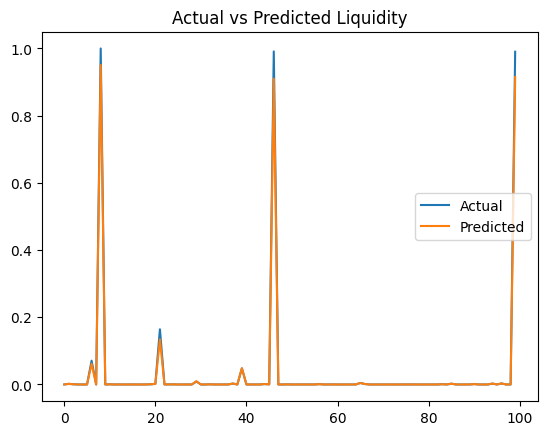

In [14]:
import matplotlib.pyplot as plt
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Liquidity')
plt.show()
